# Analisis de datos
## Investigacion "¿Cuál es el índice de desinformación que se genera entorno a estos grupos sociales?"

## 1. Preparacion de los datos

### <span style="font-weight:normal">1.1 Importacion de modulo panda y numpy</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns

### <span style="font-weight:normal">1.2 Lectura de la informacion de los archivos "Infertilidad.csv" y "Columns_variable.csv"</span>

In [2]:
data = pd.read_csv('Infertilidad.csv')
data1 = pd.read_csv('columns_variable.csv', sep=";")

### <span style="font-weight:normal">1.3 Extracion de nombre de variables</span>

In [3]:
myColumns = pd.DataFrame(
    {
        "Columnas" : data.columns
    }
)

### <span style="font-weight:normal">1.4 Asignacion del datos de las columnas extraidas.</span>

In [4]:
data.columns = data1.loc[ : , 'variable']

## 2. Limpieza de valores para la columna medio_informacion

**Explicacion**: Durante la recopilacion de la informacion cometimos el error de dejar la pregunta "¿En que plataformas o dispositivos a buscado información sobre la infertilidad?" se definio como obligatorio cuando esta deberia de depender de la pregunta "¿Ha buscado alguna vez información sobre la infertilidad?". Algunas personas respondieron que no a esta pregunta por lo tanto no tendria sentido realizar el conteo de estos valores. 

**Prueba**: Observamos como el valor del lado izquierdo se encuentra en "No" y el medio de informacion del lado derecho se encuentra en su mayoria como "Internet". 

In [5]:
for i in range(0, len(data["busqueda_informacion"])):
    if(data["busqueda_informacion"][i] == "No"): 
        print(" - ".join([data["busqueda_informacion"][i], data["medio_informacion"][i]]))

No - Internet
No - Internet
No - Ninguno
No - Internet
No - Internet
No - Internet;Redes sociales
No - Internet
No - Internet
No - Internet
No - Internet
No - Redes sociales


## 3. Analisis de valores nulos

Funcion para el calculo de los valores nulos

In [6]:
def getNullFromDf(df):
    return np.sum(pd.isnull(df))

In [7]:
def getNotNullFromDf(df): 
    return np.sum(not pd.isnull(df))

In [8]:
def get_null_df_analysis(df):
    nullDf = pd.DataFrame()
    for c_ in df.columns:
        sum_nulls = np.sum(pd.isnull(df[c_]))
        r = pd.DataFrame(
            {
                "columna": [c_],
                "sumaNulos": [sum_nulls],
                "porcentajeNulos": [sum_nulls / df.shape[0] ]
            })
        nullDf = pd.concat([ nullDf, r ])
    return nullDf;

In [9]:
def print_bars( df, col ):
    x = df.groupby([col], as_index = False ).agg({ "edad" : [ "count"] } )
    x.columns = x.columns.droplevel(1)
    x.columns = [col, 'count']
    x = x.sort_values(["count"], ascending=False)
    plt.bar(x[col], x['count'])

### Analisis N°1
El analisis de valores nulos nos permite determinar la cantidad de personas que tienen conocimiento sobre las personas cercanas a si mismo, esto sera importante en la interpretacion de informacion dado que uno de los puntos a investigar durante nuestra investigacion es el estigma de las personas en torno a la infertilidad.

In [30]:
r = pd.DataFrame(
    {
        "column": ["edad_familiar"],
        "Porcentaje_nulos": [(getNullFromDf(data["edad_familiar"]) / data.shape[0]) * 100],
        "suma_nulos": [getNullFromDf(data["edad_familiar"])]
    })
r

,column,Porcentaje_nulos,suma_nulos
0,edad_familiar,56.756757,21


### Analisis N°2
El siguiente calculo de los valores nulos nos permite determinar uno de nuestros grupos de interes. Este calculo nos determina la cantidad de personas encuestadas que sufren de infertilidad

In [48]:
r = pd.DataFrame(
    {
    "column": ["tiempo_visitar"],
    "Porcentaje_nulos": [(getNullFromDf(data["tiempo_visitar"]) / data.shape[0]) * 100],
    "suma_nulos": [getNullFromDf(data["tiempo_visitar"])]
})
r

,column,Porcentaje_nulos,suma_nulos
0,tiempo_visitar,81.081081,30


### Analisis N°3 
El siguiente calculo realiza un calculo de los valores nulos en hombres

In [46]:
dfGeneroM = data.loc[ data['genero'] == 'Masculino', : ]
null_generom_df = get_null_df_analysis(dfGeneroM)
null_generom_df

,columna,sumaNulos,porcentajeNulos
0,timestamp,0,0.00
0,edad,0,0.00
0,genero,0,0.00
0,pais,0,0.00
0,conocimiento_infertilidad,0,0.00
0,busqueda_informacion,0,0.00
0,medio_informacion,0,0.00
0,conocimiento_parejas,0,0.00
0,medio_confiable,0,0.00
0,informacion_familiar,0,0.00


### Analisis N°4
El siguiente calculo realiza un calculo de los valores nulos en mujeres

In [13]:
dfGeneroM = data.loc[ data['genero'] == 'Femenino', : ]
null_generom_df = get_null_df_analysis(dfGeneroM)
null_generom_df

,columna,sumaNulos,porcentajeNulos
0,timestamp,0,0.000000
0,edad,0,0.000000
0,genero,0,0.000000
0,pais,0,0.000000
0,conocimiento_infertilidad,0,0.000000
0,busqueda_informacion,0,0.000000
0,medio_informacion,0,0.000000
0,conocimiento_parejas,0,0.000000
0,medio_confiable,0,0.000000
0,informacion_familiar,0,0.000000


## 4. Analisis Exploratorio de datos

### 4.1 Analisis de las personas encuestadas por su genero que tienen un medio confiable 

Analisis para analizar y contrastar con la informacion encontrada en nuestro marco teorico para el analisis de los medios de informacion mas utilizado sobre la muestra estudiada. 

In [14]:
data.loc[:, [ "genero", "medio_confiable"]].value_counts()

genero     medio_confiable
Femenino   Sí                 25
Masculino  Sí                  6
Femenino   Tal vez             4
Masculino  No                  1
           Tal vez             1
dtype: int64

### 4.2 Analisis de las personas encuestadas en funcion de cuantas ellas sufren de infertilidad. 
Esto para determinar cual es la cantidad de personas mayormente afectadas de la muestra estudiada. 

In [15]:
data.loc[:, [ "genero", "informacion_personal"]].value_counts()

genero     informacion_personal 
Femenino   No se                    11
           No                        8
           Sí                        7
Masculino  No                        4
Femenino   Prefiero no responder     3
Masculino  No se                     3
           Prefiero no responder     1
dtype: int64

### 4.3 PRUEBA DE INDEPENDENCIA MEDIANTE CHI2
- H0 (Nula) = Mide la independencia de dos variables. El genero y medio_confiable no dependen una de la otra
- H1 (Alternativa) = Las variables de genero y medio_confiable son dependientes

In [16]:
data.groupby( ["genero", "medio_confiable"] ).agg({ "genero" : [ "count"] } )


genero
                           count
genero    medio_confiable       
Femenino  Sí                  25
          Tal vez              4
Masculino No                   1
          Sí                   6
          Tal vez              1

In [17]:
data.groupby( ["genero", "medio_confiable"] ).agg({ "genero" : [ "count"] } )

genero
                           count
genero    medio_confiable       
Femenino  Sí                  25
          Tal vez              4
Masculino No                   1
          Sí                   6
          Tal vez              1

### Analisis N° 5
**Respuesta de analisis de investigacion:** Este analisis nos permitira realizar un analisis para poder contestar la pregunta de nuestra investigacion 
¿Cual es el rango de edad de personas mayormente afectadas por la desinformacion?"

In [18]:
dataGender = pd.crosstab( data['genero'], data['edad'] )
dataGender

edad,17,18,22,23,24,25,26,27,28,30,31,32,33,35,36,37,38,40,42,44
genero,,,,,,,,,,,,,,,,,,,,
Femenino,1,2,1,5,0,0,2,1,0,1,1,3,0,2,1,3,2,3,1,0
Masculino,0,0,0,1,1,1,0,0,1,2,0,0,1,0,0,0,0,0,0,1


In [50]:
pd.crosstab( data['edad'], data['informacion_personal'] )

informacion_personal,No,No se,Prefiero no responder,Sí
edad,,,,
17,1,0,0,0
18,1,1,0,0
22,0,1,0,0
23,2,3,1,0
24,0,0,1,0
25,0,1,0,0
26,0,1,0,1
27,0,1,0,0
28,0,1,0,0


In [51]:
contigency = pd.crosstab( data['genero'], data['informacion_personal'] )
contigency

informacion_personal,No,No se,Prefiero no responder,Sí
genero,,,,
Femenino,8,11,3,7
Masculino,4,3,1,0


### Mapa de calor

<AxesSubplot:xlabel='informacion_personal', ylabel='genero'>

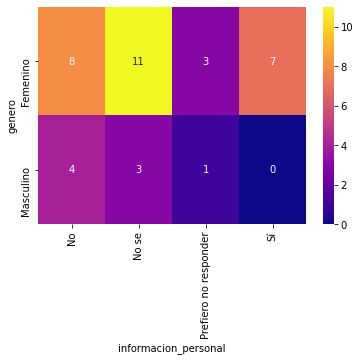

In [21]:
sns.heatmap(contigency, annot = True, cmap = "plasma")

In [22]:
c, p, dof, expected = chi2_contingency(contigency)

In [23]:
print(p)
print(p < 0.5)

0.4026157788143897
True


### Analisis de resultados chi2
- Por lo tanto no rechazamos la hipotesis nula
- Las variables son independientes

## 5. Analisis Grafico

In [24]:
x = data.groupby( ["informacion_personal"], as_index = False ).agg({ "edad" : [ "count"] } )
x.columns = x.columns.droplevel(1)
x.columns = ['informacion_personal', 'count']
x = x.sort_values(["count"], ascending=False)

<BarContainer object of 4 artists>

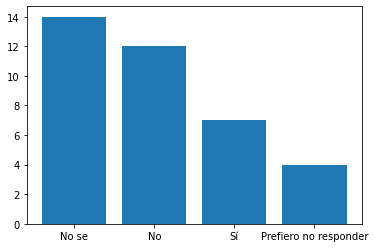

In [25]:
plt.bar(x['informacion_personal'], x['count'])

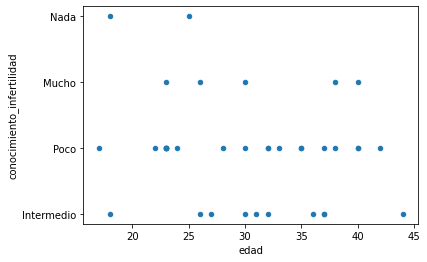

In [26]:
data.plot(kind="scatter", x="edad", y="conocimiento_infertilidad")
plt.show()

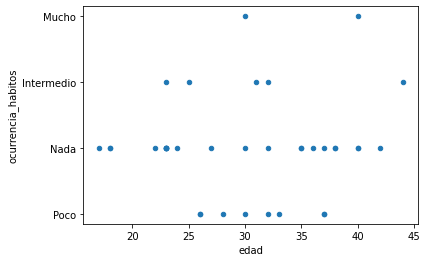

In [27]:
data.plot(kind="scatter", x="edad", y="ocurrencia_habitos")
plt.show()